<a href="https://colab.research.google.com/github/H0wAreU/Statistical-Learning-Labs./blob/main/Lab07_Boosted_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

- AdaBoost. Grid search over `n_estimators` and `learning_rate`.
- XGBoost. Grid search over `n_estimators`, `max_depth` and `learning_rate`.
- LightGBM. Grid search over `n_estimators`, `max_depth` and `learning_rate`.

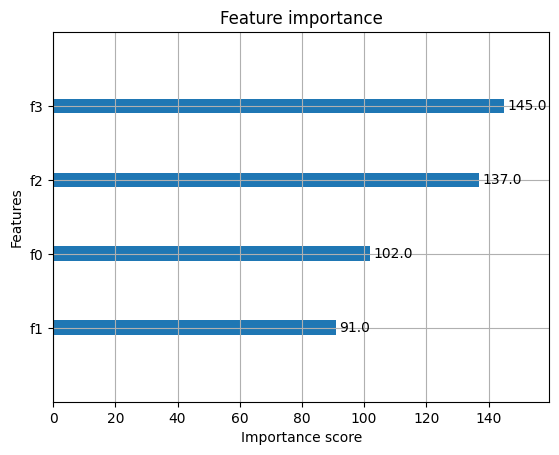

In [32]:
from xgboost import XGBClassifier, plot_importance

from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


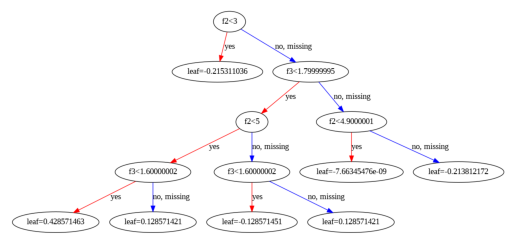

In [33]:
from xgboost import plot_tree

plot_tree(model, num_trees=1);

In [34]:
import pandas as pd

X_train = pd.read_csv('X_train.csv', header=None)


X_train



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,39.0,0.0,2.0,94.0,199.0,0.0,1.0,179.0,0.0,0.0,2.0,0.0,2.0
1,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0
2,50.0,0.0,2.0,120.0,219.0,0.0,1.0,158.0,0.0,1.6,1.0,0.0,2.0
3,54.0,1.0,0.0,140.0,239.0,0.0,1.0,160.0,0.0,1.2,2.0,0.0,2.0
4,38.0,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,50.0,1.0,2.0,140.0,233.0,0.0,1.0,163.0,0.0,0.6,1.0,1.0,3.0
208,51.0,1.0,2.0,94.0,227.0,0.0,1.0,154.0,1.0,0.0,2.0,1.0,3.0
209,69.0,1.0,3.0,160.0,234.0,1.0,0.0,131.0,0.0,0.1,1.0,1.0,2.0
210,46.0,1.0,0.0,120.0,249.0,0.0,0.0,144.0,0.0,0.8,2.0,0.0,3.0


#Performing GridSearchCV for AdaBoost.

In [35]:
from sklearn.ensemble import AdaBoostClassifier

# Define the estimator (AdaBoostClassifier)
adaboost = AdaBoostClassifier(random_state=42)

# Define the parameter grid for AdaBoost
param_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform GridSearchCV for AdaBoostClassifier
grid_search_adaboost = GridSearchCV(
    estimator=adaboost,
    param_grid=param_adaboost,
    cv=5,
    scoring='accuracy',
    n_jobs=-1 # Use all available cores
)

grid_search_adaboost.fit(X_train, y_train)

print("Best parameters for AdaBoostClassifier:", grid_search_adaboost.best_params_)
print("Best out-of-fold accuracy for AdaBoostClassifier:", grid_search_adaboost.best_score_)

Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 50}
Best out-of-fold accuracy for AdaBoostClassifier: 0.8441860465116278


**Best parameters for AdaBoostClassifier: learning_rate: 0.1, n_estimators: 50**

**Best out-of-fold accuracy for AdaBoostClassifier: 0.8441860465116278**

Feature Importances for AdaBoostClassifier:


<BarContainer object of 13 artists>

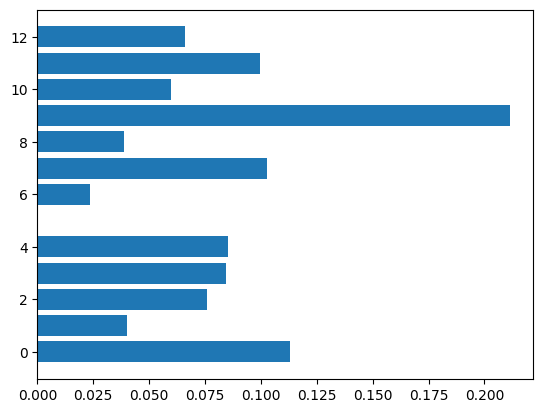

In [36]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
ad = adaboost.fit(X_train, y_train)

# Plot feature importances for AdaBoostClassifier
print("Feature Importances for AdaBoostClassifier:")
plt.barh(range(len(ad.feature_importances_)), ad.feature_importances_)

#Performing GridSearchCV for XGBoost





In [37]:
from xgboost import XGBClassifier

# Define the estimator (XGBClassifier)
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Define the parameter grid for XGBoost
param_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1 # Use all available cores
)

grid_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBClassifier:", grid_search_xgb.best_params_)
print("Best out-of-fold accuracy for XGBClassifier:", grid_search_xgb.best_score_)

Best parameters for XGBClassifier: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best out-of-fold accuracy for XGBClassifier: 0.8347729789590254


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [03:04:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Feature Importances for XGBoost:


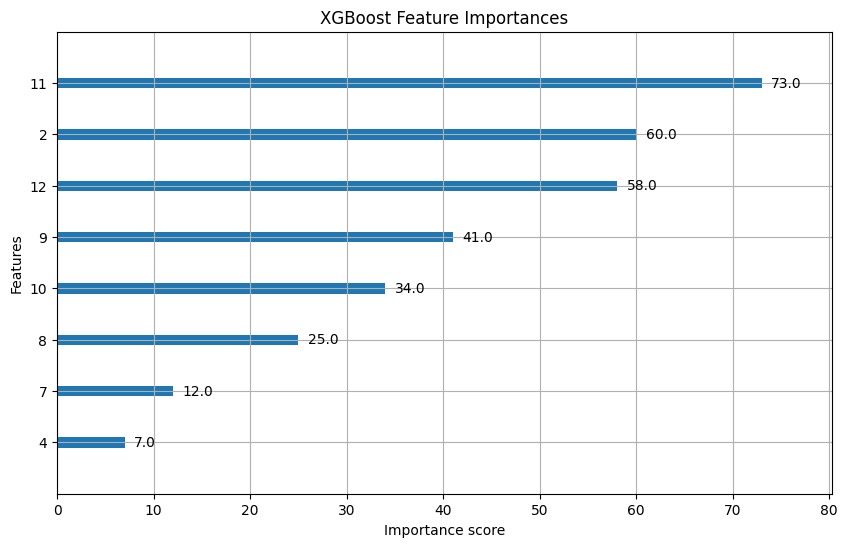

In [38]:
import matplotlib.pyplot as plt
from xgboost import plot_importance # Import plot_importance from xgboost

best_xgb = grid_search_xgb.best_estimator_

print("Feature Importances for XGBoost:")
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(best_xgb, ax=ax) # Pass the axes object to plot_importance
plt.title('XGBoost Feature Importances')
plt.show()

**Best parameters for XGBClassifier: learning_rate: 0.01, max_depth: 3, n_estimators: 50**

**Best out-of-fold accuracy for XGBClassifier: 0.8347729789590254**

# Performing GridSearchCV for LightGBM

In [39]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define the estimator (LGBMClassifier for LightGBM)
lgbm = LGBMClassifier(random_state=42)

# Define the parameter grid for LightGBM
param_lgbm = {
    'n_estimators': [50, 100, 200],
    'min_child_samples': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform GridSearchCV for LightGBM
grid_search_lgbm = GridSearchCV(
    estimator=lgbm,
    param_grid=param_lgbm,
    cv=5,
    scoring='accuracy',
)

# Load y_train
y_train = pd.read_csv('y_train.csv', header=None).squeeze()

grid_search_lgbm.fit(X_train, y_train)

print("Best parameters for LGBMClassifier:", grid_search_lgbm.best_params_)
print("Best out-of-fold accuracy for LGBMClassifier:", grid_search_lgbm.best_score_)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

Feature Importances for LGBMClassifier:


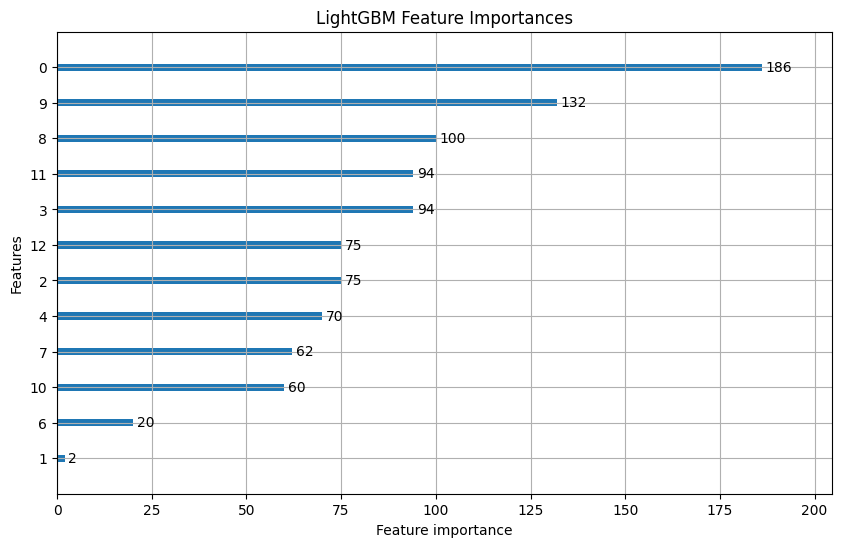

In [40]:
import matplotlib.pyplot as plt
import lightgbm as lgb # Import lightgbm for its plot_importance function

# Get the best estimator for LGBMClassifier
best_lgbm = grid_search_lgbm.best_estimator_

# Plot feature importances for LGBMClassifier
print("Feature Importances for LGBMClassifier:")
lgb.plot_importance(best_lgbm, figsize=(10, 6))
plt.title('LightGBM Feature Importances')
plt.show()

**Best parameters for LGBMClassifier: learning_rate: 0.01, min_child_samples: 7, n_estimators: 50**

**Best out-of-fold accuracy for LGBMClassifier: 0.8346622369878183**